## Analysis of decoder performance for the four generated linear decoders

This notebook analyses each of the generated linear decoder's performance in the closed loop in four groups:
 - A : all rigid bodies bar the right hand (control rigid body)
 - B : all rigid bodies bar the right side 
 - C : Left Hand only
 - D : Right Hand Only (control)

In [14]:
# First import the necessary libraries
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')
from Experiment_pointer.DataAnalysis.postProcessRawData import processTrialData, readIndividualTargetMovements,plotVar,calcNormalisedAcquisitionTimes


In [15]:
# function to plot trajectories
def plotTrajectoriesClosedLoop(returnDict,k = None,savepath=None):
    individualMovements = readIndividualTargetMovements(returnDict)
    print("First let's plot the trajectories")
    if k is not None:
        
        cursorPosData = individualMovements['cursorPosData'][0:int(2*k):2] #  trajectories
    else:
        cursorPosData = individualMovements['cursorPosData'][0:-1:3] #  trajectories
    cursorPosData = individualMovements['cursorPosData']
    plotVar(cursorPosData,list_ = True,invertY=True)
    ax1 = plt.gca()  # Get current axes


    # Remove top and right spines for the first plot
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Reduce x and y ticks and increase font
    plt.xticks([0,1], fontsize = 20)
    plt.yticks([0,1],fontsize = 20)
    plt.xlabel("Normalised X position", fontsize = 20, fontweight = "bold")
    plt.ylabel("Normalised Y position",fontsize = 20,fontweight = "bold")
    if savepath is not None:
        pass
        #plt.savefig(savepath)
    plt.show()


    print("Now let's plot the evolution of normalised aquisition time")
    acquireTimes = calcNormalisedAcquisitionTimes_jpy(individualMovements)
    return acquireTimes

def calcHumanPerformance_jpy(totalTime,reactionTime,D,W):
    """uses Fitts law to calculate human performance"""
    MT = totalTime - reactionTime
    ID = np.log2((2*D)/W)
    IP = ID / MT
    return IP

def calcDist(startPos,endPos):
    ranges = [1100,800]
    return np.sqrt(np.sum([ (ranges[i] * (endPos[i] - startPos[i])) ** 2 for i in range(len(startPos))]))

def calcNormalisedAcquisitionTimes_jpy(processedDataDict,start = 0, end = -1,reactionTime = 300):
    """
    This function takes in data giving the start and location for each acquisition and 
    """
    cursorPosData = processedDataDict['cursorPosData'][start:end]
    timestamps = processedDataDict['timestamps'][start:end]
    IPs = []
    pathLengths = []

    for idx,var in enumerate(cursorPosData):
        var = var.transpose()
        # Calculate the distance to each target from the starting point
        startPos = (var[0,0],var[0,1])
        endPos = (var[-1,0],var[-1,1])
        idxes = len(var[:,0])
        distToTarget = np.sqrt(np.sum([ (endPos[i] - startPos[i]) ** 2 for i in range(len(startPos))]))
        
        # Calculate distance unnormalised distance for fitts law
        ranges = [1100,800]
        D = np.sqrt(np.sum([ (ranges[i] * (endPos[i] - startPos[i])) ** 2 for i in range(len(startPos))]))
        if D == 0:
            continue
        pathlength =sum([calcDist( (var[i,0],var[i,1]), (var[i+1,0],var[i+1,1])  ) for i in range(0,idxes-2)])
        #print(pathlength)
        pathLengths.append(pathlength)
        # Calculate the time difference  
        timeStart = timestamps[idx][0]
        timeEnd = timestamps[idx][-1]




        # the raw acquisition time before being normalised for distance and reaction time
        totalTime = timeEnd - timeStart
        cursorWidth = 60
        IP = calcHumanPerformance_jpy(totalTime,reactionTime,D,W=60)
        IPs.append(IP)
        

        
    plt.plot(IPs, label = "Index of Performances")
    plt.show()
    return IPs,pathLengths
    

We first start with group A

Plot the cursor position paths

In [16]:
# i =  "../PointerExperimentData/Ashwin_12_01__19_57_trial1" 
# from Experiment_pointer.runFullExperiment import *
# modelA_dict = fitModelToData(mode = 'RigidBodiesSetA',tester = 'linear', \
# compPca = None,savePath=i, colorMap=colorMap,plot=False,DOFOffset= 0.01,ignoreTargetMotionTimesLessThan=0)
# #gather pred pos
# print(modelA_dict['Times'])
# print(len(modelA_dict['TestCursorPos']))



In [17]:
# IPs = plotTraj(modelA_dict, k=20,i=i)
# print(IPs)

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis


First let's plot the trajectories


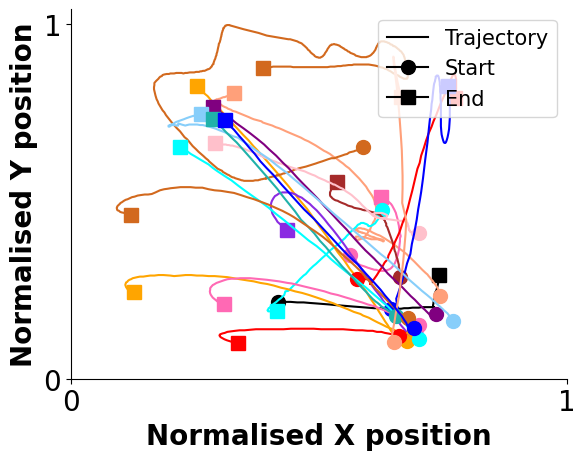

Now let's plot the evolution of normalised aquisition time


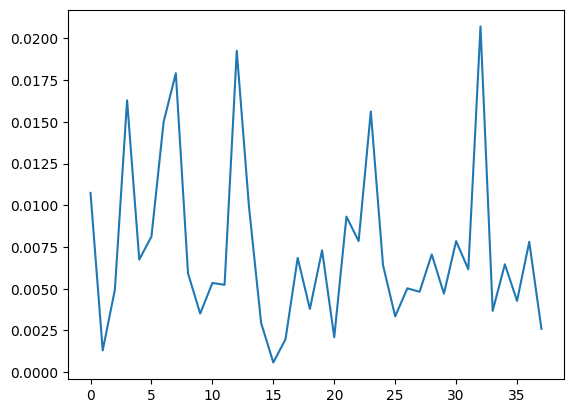

In [18]:
# Group A
print(os.getcwd()) 

gameSavePath = "Ashwin_12_01__19_57_trial1" 
returnDict = processTrialData(gameSavePath+"_usingDecoderA.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
acquireTimesA,pathsA = plotTrajectoriesClosedLoop(returnDict,savepath=gameSavePath + "decoderATraj_closedLoop(c).svg")


Now move to group B

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
First let's plot the trajectories


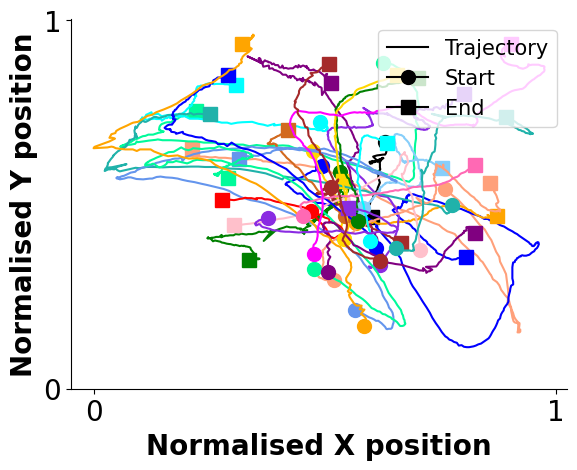

Now let's plot the evolution of normalised aquisition time


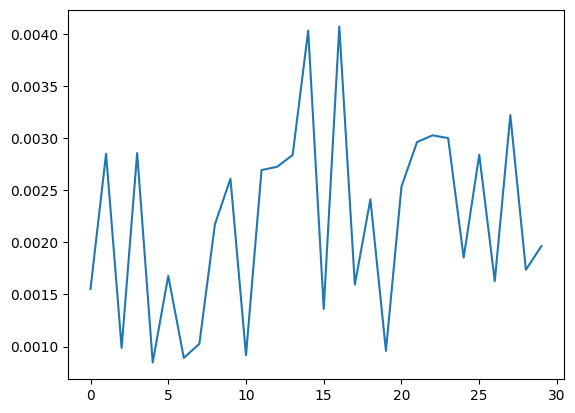

In [19]:
# Group B

returnDict = processTrialData(gameSavePath+"_usingDecoderB.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
acquireTimesB,pathsB = plotTrajectoriesClosedLoop(returnDict,k = 5,savepath=gameSavePath + "decoderBTraj_closedLoop(d).svg")

Now we move to group C

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
First let's plot the trajectories


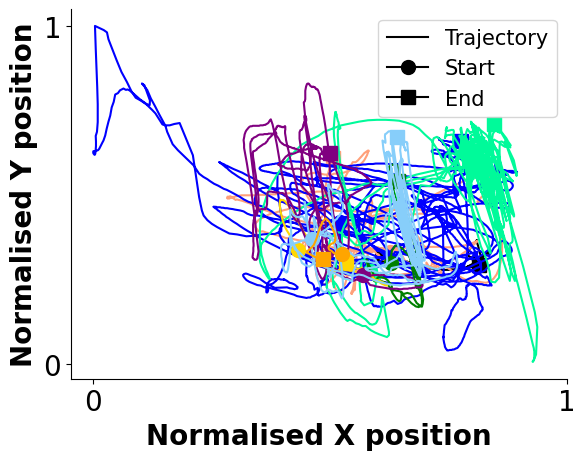

Now let's plot the evolution of normalised aquisition time


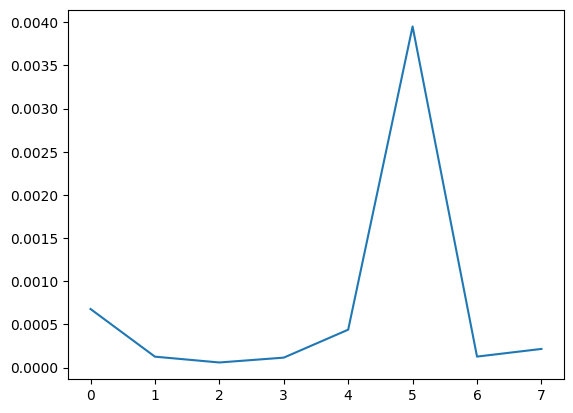

In [20]:
# Group C

returnDict = processTrialData(gameSavePath+"_usingDecoderC.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
acquireTimesC,pathsC = plotTrajectoriesClosedLoop(returnDict,savepath=gameSavePath + "decoderCTraj_closedLoop(e).svg")

And finally group D, the control

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
First let's plot the trajectories


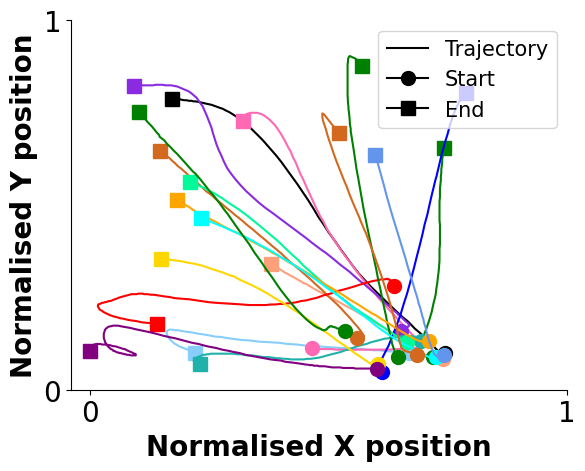

Now let's plot the evolution of normalised aquisition time


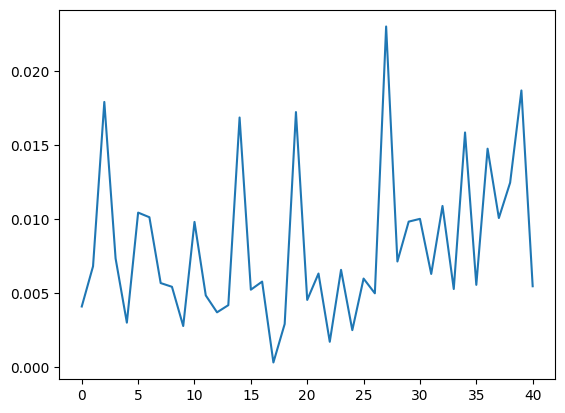

In [21]:
# Group D

returnDict = processTrialData(gameSavePath+"_usingDecoderD.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
acquireTimesD,pathsD = plotTrajectoriesClosedLoop(returnDict,savepath=gameSavePath + "decoderDTraj_closedLoop(f).svg")

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
First let's plot the trajectories


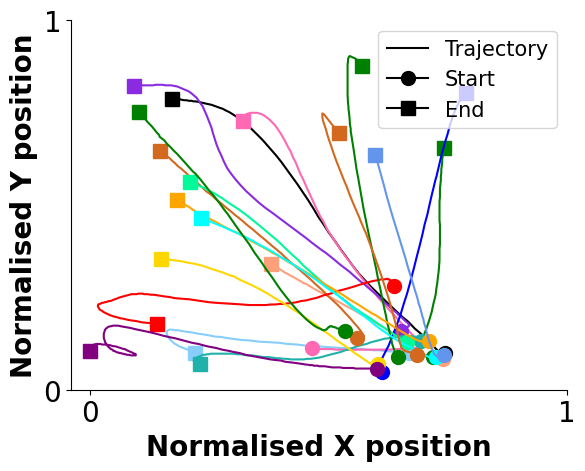

Now let's plot the evolution of normalised aquisition time


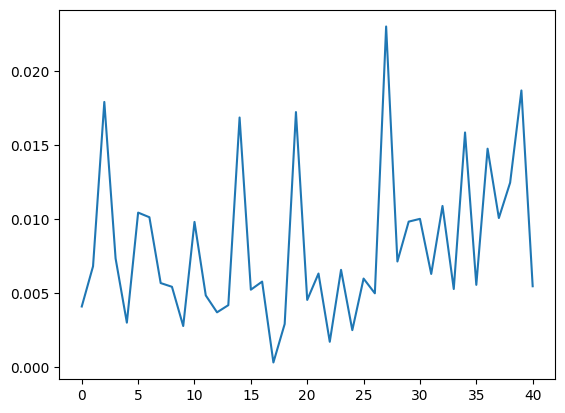

In [22]:
# Group D

returnDict = processTrialData(gameSavePath+"_usingDecoderD.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
individualMovements = readIndividualTargetMovements(returnDict)
test = plotTrajectoriesClosedLoop(returnDict,savepath=gameSavePath + "decoderDTraj_closedLoop(f).svg")

Now let's overlay all aquisition time plots

In [23]:
decoderAColor = (245,5,5) # (RGB) or F50505 (Hex)
decoderAColorPlt = (245/255,5/255,5/255) # (RGB) or F50505 (Hex)
decoderAColor_ = 'rgb(245,5,5)'
decoderBColor = (53,5,245) # (RGB) or #3505F5 (Hex)
decoderBColorPlt = (53/255,5/255,245/255) # (RGB) or #3505F5 (Hex)
decoderBColor_ = 'rgb(53,5,245)'
decoderCColor = (2,250,242) # (RGB) or  #02FAF2 (Hex)
decoderCColorPlt = (2/255,250/255,242/255) # (RGB) or  #02FAF2 (Hex)
decoderCColor_ = 'rgb(2,250,242)'
decoderDColor = (245,237,5) # (RGB) or F5ED05 (Hex)
decoderDColorPlt = (245/255,237/255,5/255) # (RGB) or F5ED05 (Hex)
decoderDColor_ = 'rgb(245,237,5)'

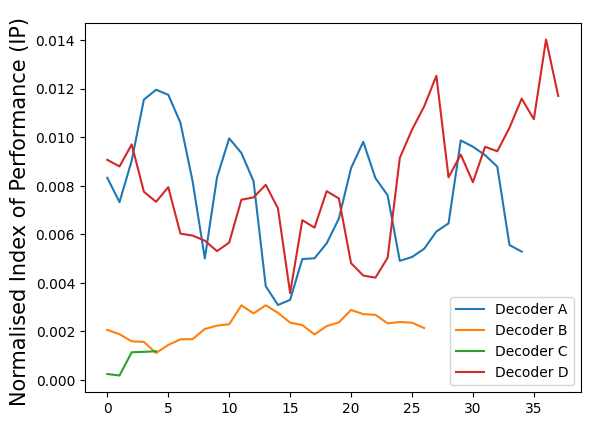

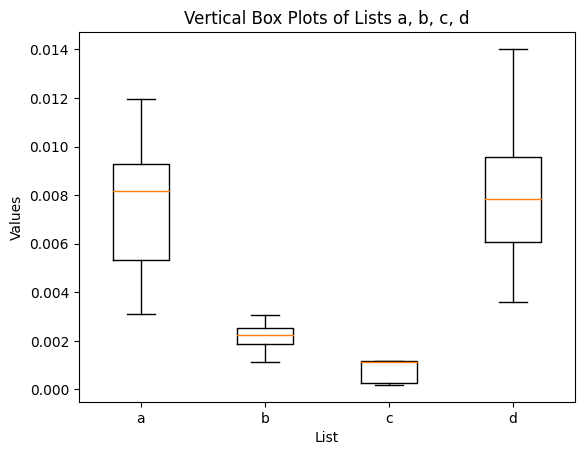

In [24]:
def smooth_list(data, window_size,useLog = False):
    """
    Smooths the data using a moving average filter.

    :param data: The list of numbers to be smoothed.
    :param window_size: The number of elements to consider in each average.
    :return: A list of smoothed numbers.
    """
    if useLog:
        data = [np.log(_) for _ in data ]
    if window_size <= 0:
        raise ValueError("Window size must be positive")

    if window_size > len(data):
        raise ValueError("Window size cannot be larger than the data list length")

    smoothed_data = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        window_average = sum(window) / window_size
        smoothed_data.append(window_average) #0.0128

    return smoothed_data

a__ = smooth_list(acquireTimesA,4)
b__ = smooth_list(acquireTimesB,4)
c__ = smooth_list(acquireTimesC,4)
d__ = smooth_list(acquireTimesD,4)
plt.plot(a__, label = "Decoder A")
plt.plot(b__, label = "Decoder B")
plt.plot(c__, label = "Decoder C")
plt.plot(d__, label = "Decoder D")
#plt.plot(smooth_list(IPs,5), label = "Nominal")
plt.ylabel("Normalised Index of Performance (IP) ",fontsize = 15)
plt.legend()
plt.show()

# Create a figure and an axes
fig, ax = plt.subplots()

# Plotting the box plots
ax.boxplot([a__, b__, c__, d__])

# Adding titles and labels
ax.set_title('Vertical Box Plots of Lists a, b, c, d')
ax.set_xlabel('List')
ax.set_ylabel('Values')
ax.set_xticklabels(['a', 'b', 'c', 'd'])

# Show the plot
plt.show()

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_22087/587636111.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("PlotsForLentReport/performances.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_22087/587636111.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("PlotsForLentReport/performances.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_22087/587636111.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("PlotsForLentReport/performances.svg")


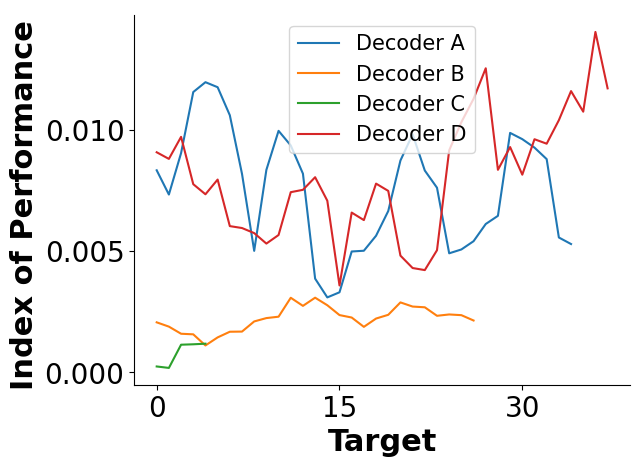

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_22087/587636111.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("PlotsForLentReport/pathLengths.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_22087/587636111.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("PlotsForLentReport/pathLengths.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_22087/587636111.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("PlotsForLentReport/pathLengths.svg")


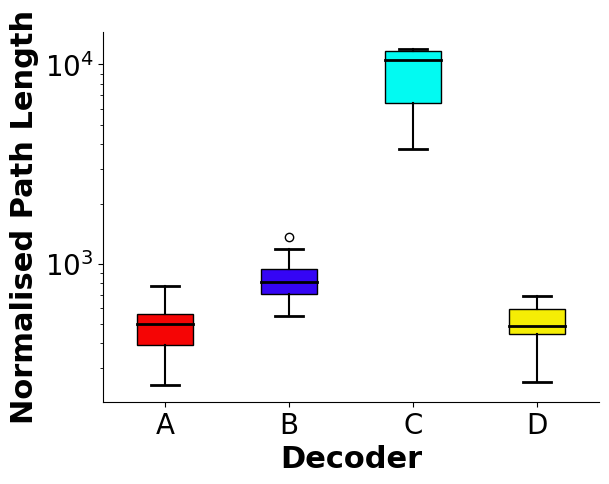

In [25]:
# Finally path length metric
a = smooth_list(pathsA,4,useLog = False)
a_ = [np.log(i) for i in a]
b = smooth_list(pathsB,4,useLog = False)
b_ = [np.log(i) for i in b]
c = smooth_list(pathsC,4,useLog = False)
c_ = [np.log(i) for i in c]
d = smooth_list(pathsD,4,useLog = False)
d_ = [np.log(i) for i in d]
plt.plot(a__, label = "Decoder A")
plt.plot(b__, label = "Decoder B")
plt.plot(c__, label = "Decoder C")
plt.plot(d__, label = "Decoder D")
#plt.plot(smooth_list(IPs,5), label = "Nominal")
plt.ylabel("Index of Performance ",fontsize = 22,fontweight='bold')
plt.xlabel("Target",fontsize = 22,fontweight='bold')
plt.legend(fontsize = 15)
plt.xticks([0,15,30])
ax1 = plt.gca()
ax1.tick_params(labelsize = 20)
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig("PlotsForLentReport/performances.svg")
plt.show()

# Create a figure and an axes
fig, ax = plt.subplots()

# Plotting the box plots
# ax.boxplot([a, b, c, d])

box = ax.boxplot([a, b, c, d], patch_artist=True)
# Customize colors
colors = [decoderAColorPlt, decoderBColorPlt, decoderCColorPlt,decoderDColorPlt]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize the whiskers, caps, and median
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='black', linewidth=2)
for median in box['medians']:
    median.set(color='black', linewidth=2)
# Adding titles and labels

ax.set_xlabel('Decoder',fontsize = 22,fontweight='bold')
ax.set_ylabel('Normalised Path Length',fontsize = 22,fontweight='bold')
ax.tick_params(labelsize = 20)
ax.set_xticklabels(['A', 'B', 'C', 'D'])
plt.yscale('log')

# Show the plot

ax1 = plt.gca()  # Get current axes


# Remove top and right spines for the first plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig("PlotsForLentReport/pathLengths.svg")
plt.show()